# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
path="/content/drive/MyDrive/AIML/M1_Python_Foundations/Project/foodhub_order.csv"
df=pd.read_csv(path)

In [5]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Checking number of rows and columns
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: Order Id, Customer ID, Food preparation time and Delivery time is Integer datatype. Restaurant name, Cuisine type, Day of the week and Rating is Object (String) datatype and Cost of the order is Float datatype.




###Rating should be an integer or float datatype, however it is an object datatype. Let's investigate why.

In [8]:
# Checking data in rating column
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


### Observations: It appears that the cause for rating being an object datatype is due to the 'Not given' text data, so it should be replaced with missing values. Before that, I want to keep track which rows originally had 'Not given' in the rating column by creating a new categorical column.

In [9]:
# Creating a new column (rating_not_given) to track where 'Not given' was originally present.
# If there is a rating, the value in the new column will be 0, and if the rating was 'Not given' it will get a value of 1.
df['rating_not_given'] = df['rating'].apply(lambda x: 1 if x == 'Not given' else 0)

In [10]:
# Replacing 'Not given' with missing values in the rating column
df['rating'] = df['rating'].replace('Not given', np.nan)

In [11]:
# Converting rating datatype to float
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [12]:
# Checking for missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0
rating_not_given,0


#### Observations: Only the rating column has missing values. Let's replace the missing values by imputing the median rating (since the rating data is skewed) grouped by restauarant name


In [13]:
# Replacing missing values with the median rating grouped by the restaurant_name
df['rating']=df['rating'].fillna(value=df.groupby(['restaurant_name'])['rating'].transform('median'))

In [14]:
# Checking to see if there are any missing values in the rating column after imputing the median
df['rating'].isnull().sum()

np.int64(30)

### Observations: There are still missing values after imputing the median. This is propably due to certain restaurants only having missing values in the rating column. Let's replace the remaining missing values with the overall median.

In [15]:
# Imputing the remaining missing values with the overall median
overall_median = df['rating'].median()
df['rating'] = df['rating'].fillna(overall_median)

In [16]:
# Converting the rating column to integer datatype
df['rating']=df['rating'].astype(int)

In [17]:
# Checking to see if there are any missing values in the rating column after imputing the overall median
df['rating'].isnull().sum()

np.int64(0)

### There are no longer any missing values in the rating column

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [18]:
# Checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,4.343519e+00,0.663859,3.00,4.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
rating_not_given,1898.0,3.877766e-01,0.487372,0.00,0.00,0.00,1.000000e+00,1.00


#### Observations: The minimum time it takes for food to be prepared once an order is placed is 20 minutes. The average time is 27.37 minutes and the maximum is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [19]:
# Checking how many orders are not rated using the rating_not_given column that I created in cell 8
df['rating_not_given'].value_counts()

,count
rating_not_given,
0,1162
1,736


#### Observations: 736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [20]:
# Count of orders in the dataset
print(df['order_id'].count())

1898


Observations:


*   There are 1898 orders in the dataset.




There are 1200 different customers in the dataset
------------------------------------------------------------------------------------------------------------------------------------------------------


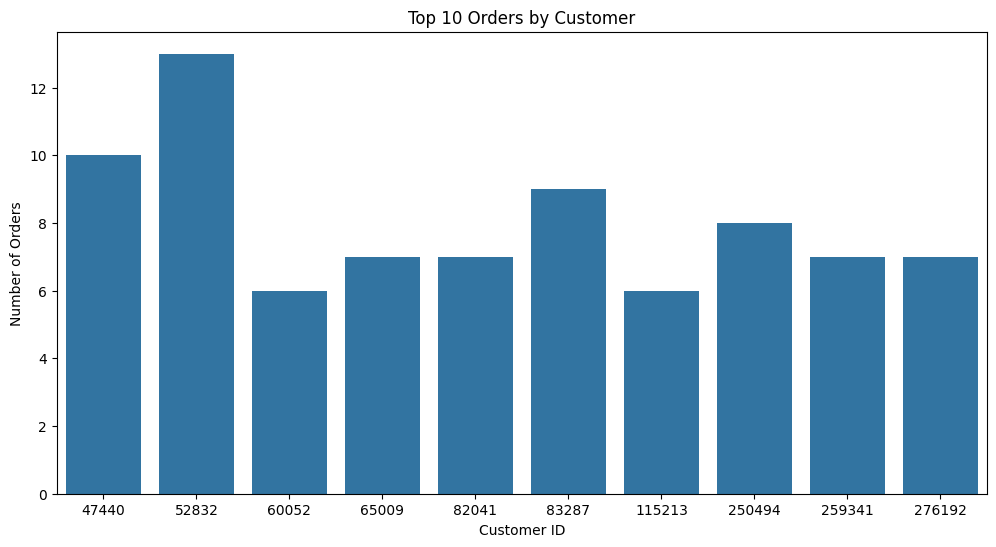

In [21]:
## Univariate analysis of customer_id

# Calculating the number of customers
num_cust=df['customer_id'].nunique()
print('There are',num_cust,'different customers in the dataset')
print('-'*150)

# Finding the top 10 customers with most number of orders
top_cust = df['customer_id'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 customers
df_top_cust=df[df['customer_id'].isin(top_cust)]

# Distribution of the top 10 customers using a countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df_top_cust,x='customer_id');
plt.title('Top 10 Orders by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

Observations:


*   There are 1200 different customers in the dataset.
*   The the customer who ordered the most number of times is Customer ID: 52832.



There are 178 different restaurants in the dataset
------------------------------------------------------------------------------------------------------------------------------------------------------


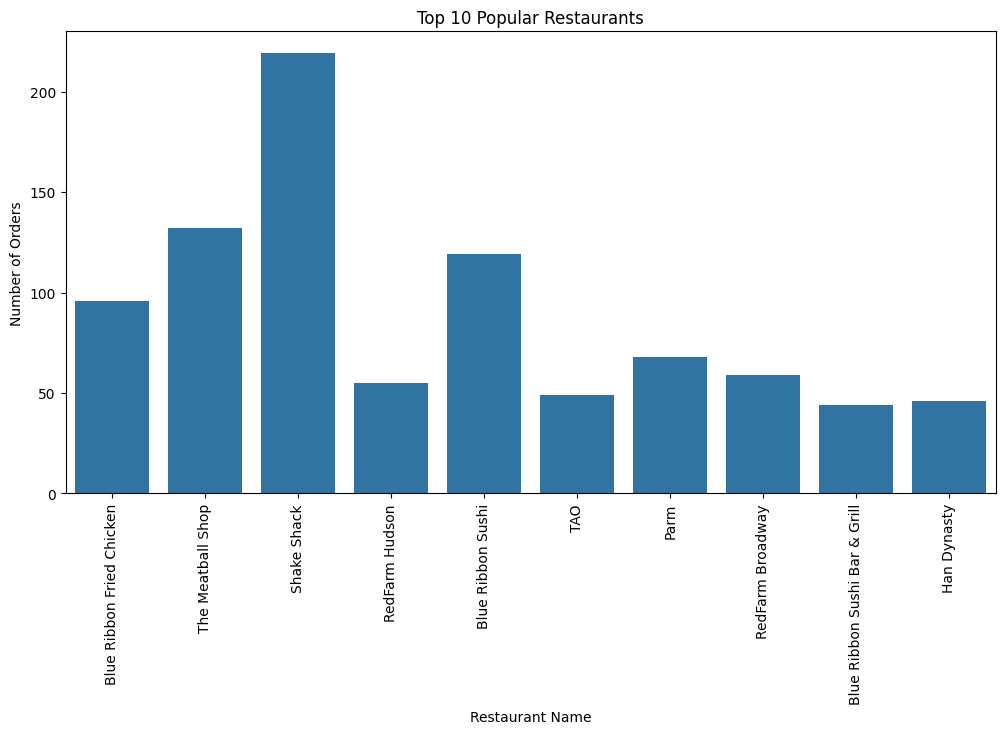

In [22]:
##Univariate analysis of restaurant_name

# Calculating the number of restaurants
num_restaurants = df['restaurant_name'].nunique()
print('There are',num_restaurants,'different restaurants in the dataset')
print('-'*150)

# Finding the top 10 restaurants with the most number of orders
top_restaurants = df['restaurant_name'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 restaurants
df_top_rest = df[df['restaurant_name'].isin(top_restaurants)]

# Distribution of the top 10 restaurants using a countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df_top_rest,x='restaurant_name');
plt.title('Top 10 Popular Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()



Observations:


*   There are 178 different restaurants in the dataset.
*   The restaurant with the most orders is Shake Shack.



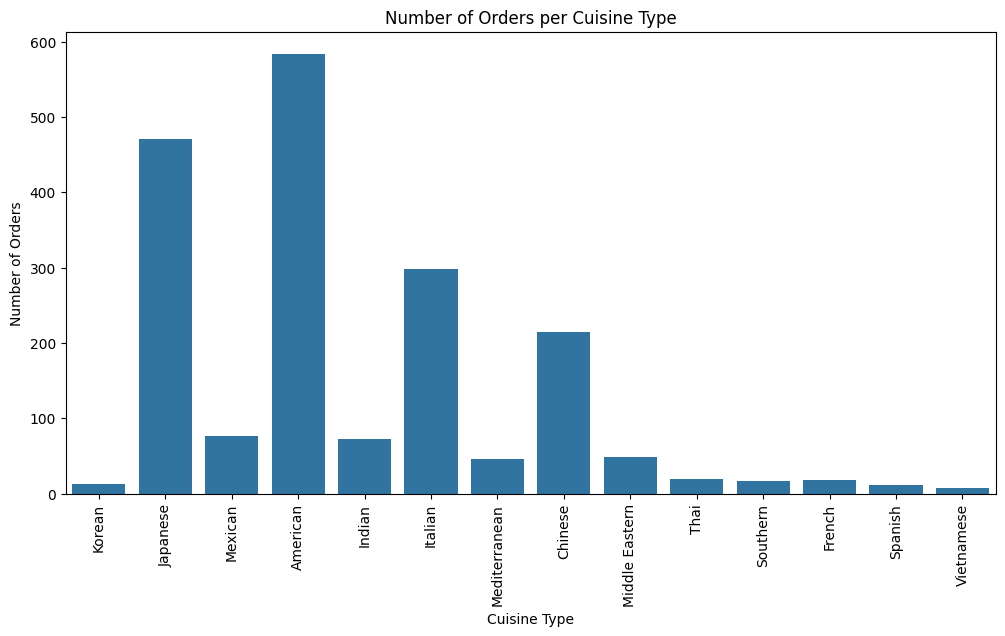

In [23]:
# Distribution of cuisine_type using a countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='cuisine_type');
plt.xticks(rotation=90)
plt.title('Number of Orders per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.show()

Observations:


*   The most popular cuisine type is American, followed by Japanese, Italian and Chinese.
*   The least popular cuisine type is Vietnamese.



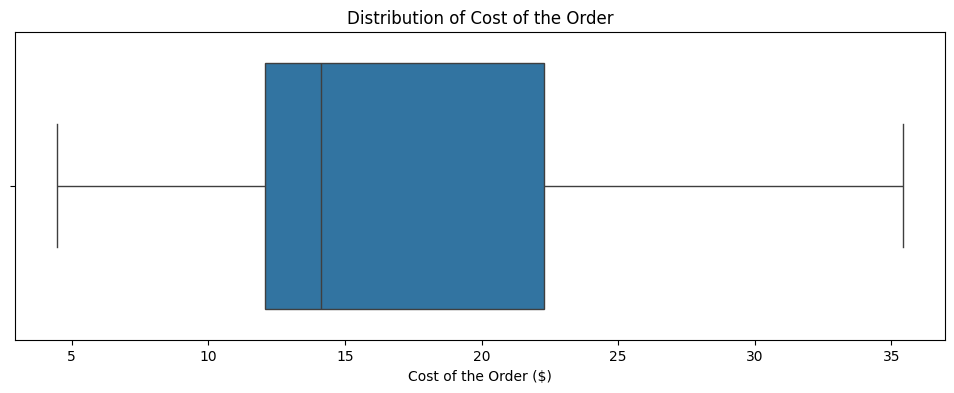

The minimum cost of the order is 4.47 $.
The maximum cost of the order is 35.41 $.
The median cost of the order is 14.14 $.


In [24]:
# Distribution of cost_of_the_order using a boxplot
plt.figure(figsize=(12,4))
sns.boxplot(data=df,x='cost_of_the_order');
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order ($)')
plt.show()

# Min, Max and Median values for cost_of_the_order
print('The minimum cost of the order is',df['cost_of_the_order'].min(),'$.')
print('The maximum cost of the order is',df['cost_of_the_order'].max(),'$.')
print('The median cost of the order is',df['cost_of_the_order'].median(),'$.')

Observations:


*   The cost of the order ranges between 4.47 and 35.41 Dollars.
*   The distribution right-skewed (positively-skewed).
*   50% of the orders cost more than 14.14$.
*   There are no apparent outliers in this distribution.



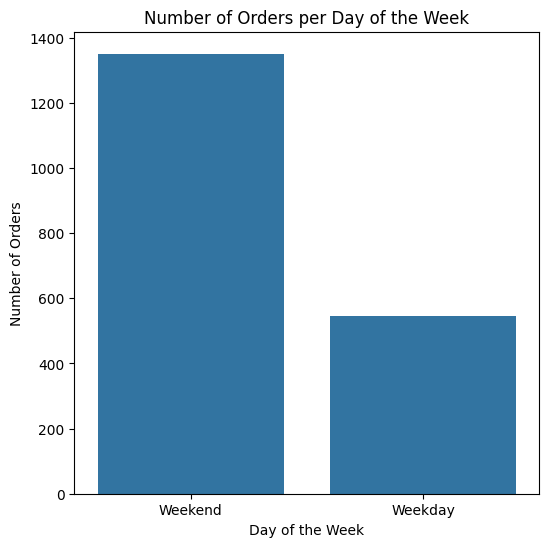

In [25]:
# Distribution of day_of_the_week using a countplot
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='day_of_the_week');
plt.title('Number of Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

Observations:


*   Most orders are placed on the weekend




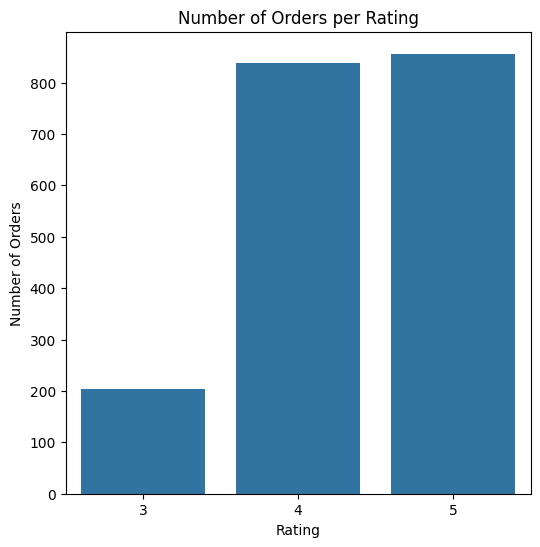

In [26]:
# Distribution of rating using a countplot
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='rating');
plt.title('Number of Orders per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

Observations:


*   Most of the ratings are high (4 or 5)
*   There are no ratings below 3




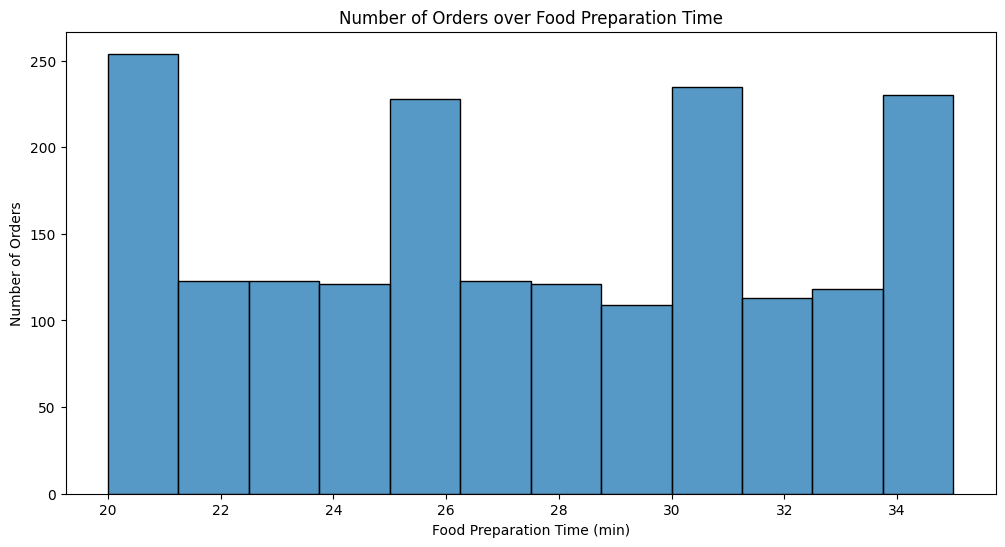

The minimum food preparation time is 20 minutes.
The maximum food preparation time is 35 minutes.


In [27]:
# Distribution of food_preparation_time using a histogram
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='food_preparation_time');
plt.title('Number of Orders over Food Preparation Time')
plt.xlabel('Food Preparation Time (min)')
plt.ylabel('Number of Orders')
plt.show()

# Min and Max values for food_preparation_time
print('The minimum food preparation time is',df['food_preparation_time'].min(),'minutes.')
print('The maximum food preparation time is',df['food_preparation_time'].max(),'minutes.')

Observations:


*   The food preparation time ranges between 20 and 35 minutes.
*   The distribution is symmetrical.



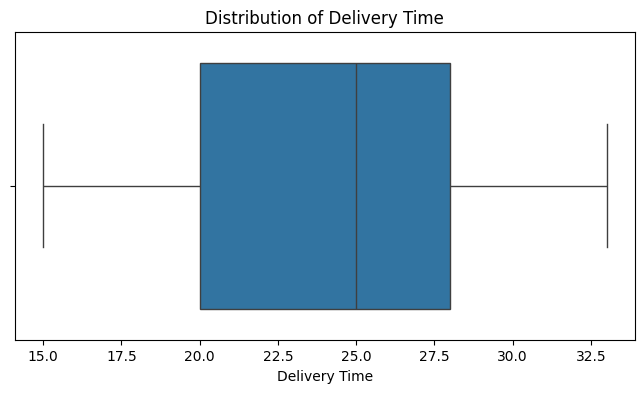

The minimum delivery time  is 15 minutes.
The maximum delivery time is 33 minutes.


In [28]:
# Distribution of delivery_time using a boxplot
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='delivery_time');
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.show()

# Min and Max values for delivery_time
print('The minimum delivery time  is',df['delivery_time'].min(),'minutes.')
print('The maximum delivery time is',df['delivery_time'].max(),'minutes.')

Observations:


*   The delivery time ranges between 15 and 33 minutes.
*   The distribution is slightly left-skewed (negatively-skewed).
*   Approximately 50% of the orders took lees than 25 minutes to deliver.
*   There are no apparent outliers in delivery time.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [29]:
# Top 5 restaurants in terms of the number of orders received
df['restaurant_name'].value_counts().nlargest(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: The top 5 restaurants in descending order are Shake Shack (219), The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96) and Parm (68).


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [30]:
## Finding the most popular cuisine on weekends

# Filtering for weekend data
weekend_data=df[df['day_of_the_week']=='Weekend']

# Counting cuisine orders on the weekend
cuisine_count=weekend_data['cuisine_type'].value_counts()
cuisine_count

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


#### Observations: The most popular cuisine on weekends is American with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [31]:
## Calculating percentage of the orders that cost more than 20 dollars

# Filtering for orders that cost more than 20 dollars
expensive_order_data=df[df['cost_of_the_order']>20]

# Printing the percentage of orders that cost more than 20 dollars
print('The percentage of the orders cost more than 20 dollars is',(expensive_order_data.shape[0]/df.shape[0])*100,'%')

The percentage of the orders cost more than 20 dollars is 29.24130663856691 %


#### Observations: The percentage of the orders cost more than 20 dollars is 29.24 %


### **Question 10**: What is the mean order delivery time? [1 mark]

In [32]:
# The mean order delivery time
print('The mean order delivery time is',df['delivery_time'].mean(),'minutes.')

The mean order delivery time is 24.161749209694417 minutes.


#### Observations: The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [33]:
# Finding the top 3 most frequent customers and the number of orders they placed
top_three_cust = df['customer_id'].value_counts().nlargest(3)
top_three_cust

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: The top 3 most frequent customers and the number of orders they placed is 52832 (13 orders), 47440 (10 orders) and 83287 (9 orders).


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


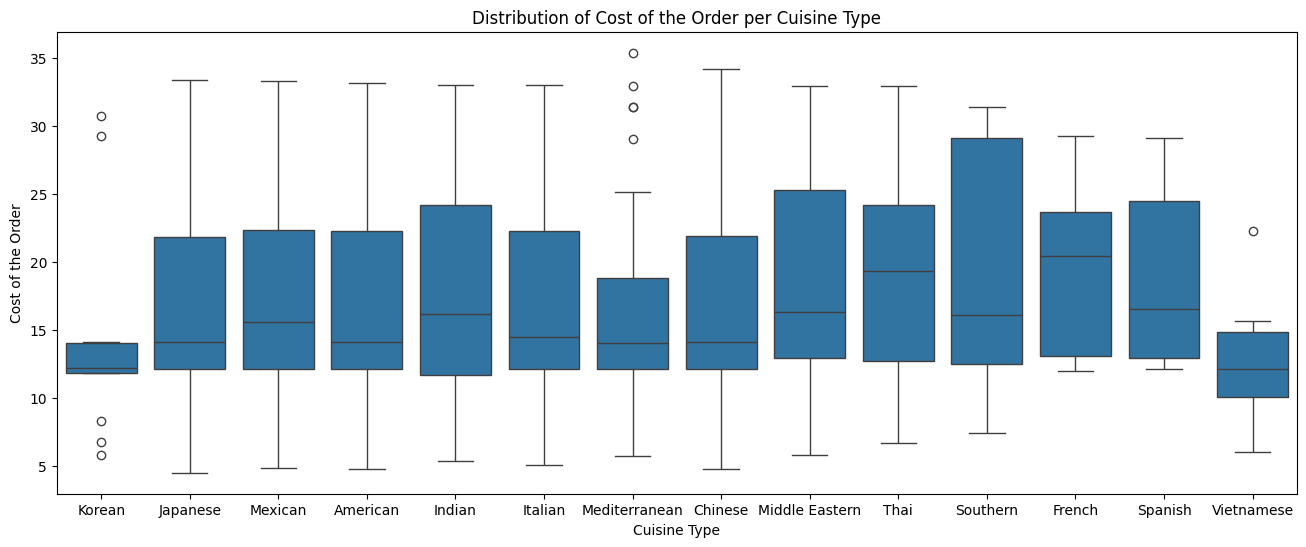

In [34]:
# Distribution of cost_of_the_order per cuisine_type using boxplots
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order');
plt.title('Distribution of Cost of the Order per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.show()

Observations:


*   French and Thai cuisines have the two most expensive median cost of the order, whereas Korean and Vietnamese cuisines have the two cheapest cost of the order.
*   There are outliers for 3 cuisine types:
    * Korean cuisine has abnormally cheap and abnormally expensive orders.
    * Mediterranean cuisine has abbnormally expensive orders.
    * Vietnamese cuisine has one abnormally expensive order.
*   The distributions of the cost of orders for all the cuisines (with the exception of Thai, French and Vietnamese) appear to be right-skewed or slightly right-skewed.







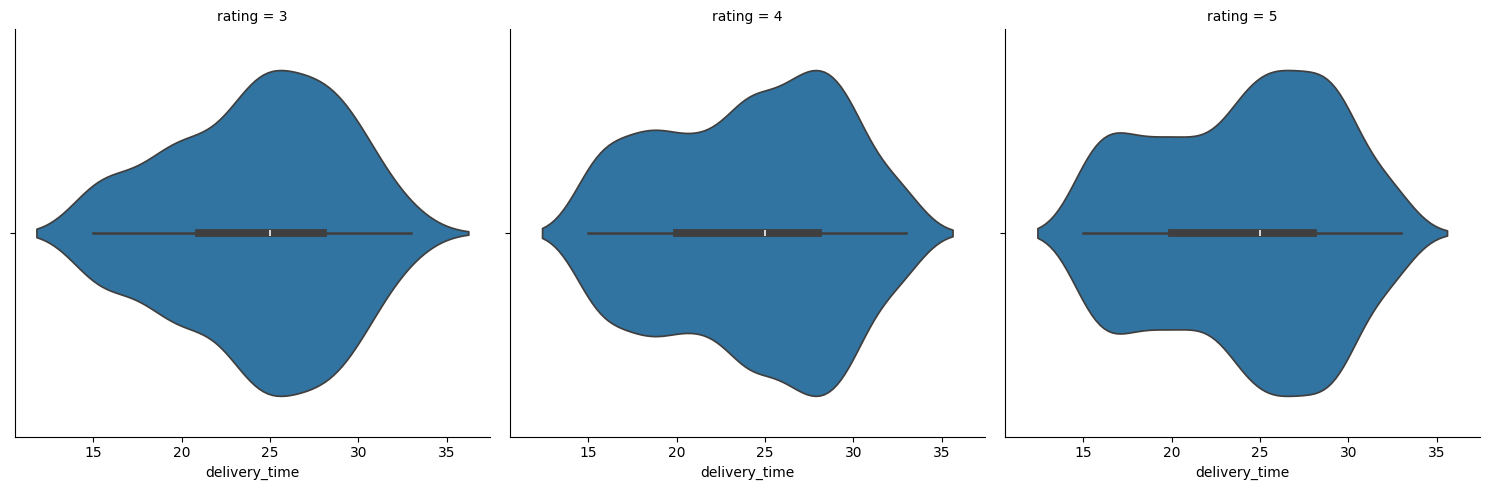

In [35]:
# Distribution of delivery time by rating using violin plots
sns.catplot(data=df,x='delivery_time',col='rating',kind='violin');

#Observations:


*   The distribution of delivery time for each rating is left-skewed (negatively skewed) where 50% of the delivery times are above approximately 25 minutes.
*   There is a slight difference between the distributions:
  * When looking at the lower whiskers (quick delivery times), there is a lower percentage of instances when the rating is 3, compared to the higher ratings of 4 and 5
  * This could indicate that the quicker the delivery time, the higher the rating the customer gives. However this difference is minimal and will need further investigation



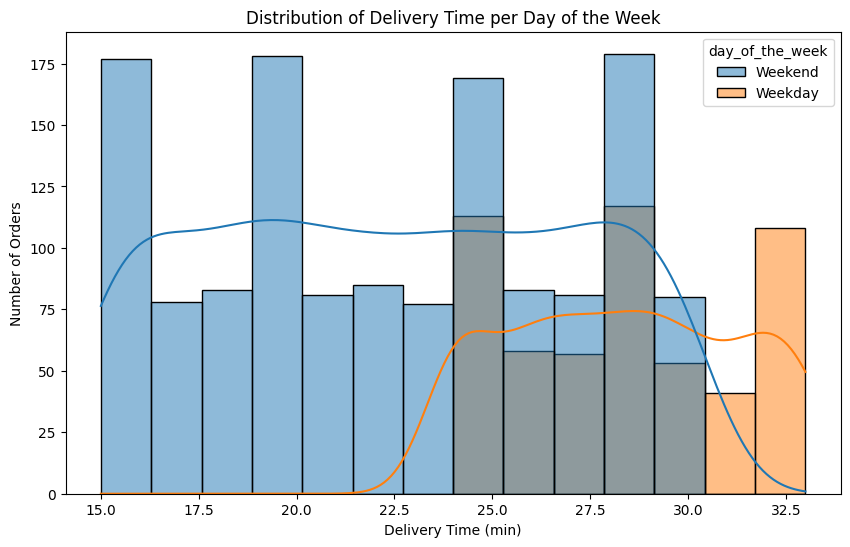

In [36]:
# Distribution of delivery_time per day_of_the_week using a histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='delivery_time',hue='day_of_the_week',kde=True);
plt.title('Distribution of Delivery Time per Day of the Week')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Number of Orders')
plt.show()

Observations:


*   On average, the delivery time is longer for orders placed on weekdays versus orders placed on the weekend.
*   Delivery times for orders placed on weekdays range from approximately 24 - 33 minutes, whereas delivery times for orders placed on weekends range from approxiamtely 15 - 31 minutes.



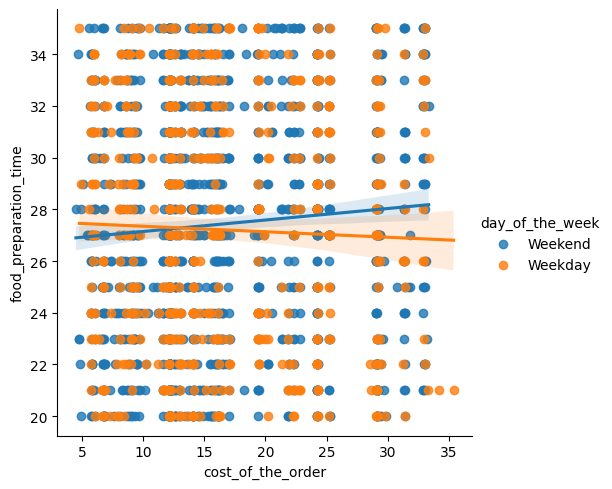

In [37]:
# Analysing the relationship between cost_of_the_order and food_preparation_time by day_of_the_week using a lineplot/scatterplot
sns.lmplot(data=df,x='cost_of_the_order',y='food_preparation_time',hue='day_of_the_week');

# Observations:

*   There is no apparent correlation between cost of the order and food preparation time.
*   However there is a weak positive correlation (the higher the cost, the longer it takes to prepare the food) on the weekend, and there is a weak negative correlation (the higher the cost, the less time it takes to prepare the food) during weekdays.
  * These correlations are very weak and probably does not represent any substatntial relationship between the cost of the order and food preparation time.



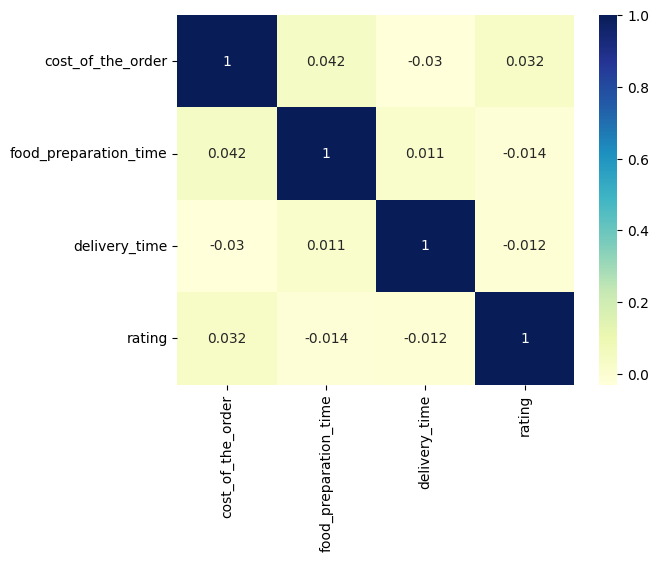

In [38]:
# Correlation matrix between the variables of cost_of_the_order, food_preparation_time and delivery_time
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time','rating']].corr(),annot=True,cmap='YlGnBu');

Observations:


*   There is no significant correlation between the variables of cost of the order, food preparation time, delivery time and rating.




Text(0.5, 1.03, 'Distribution of Food Preparation Time by Cuisine')

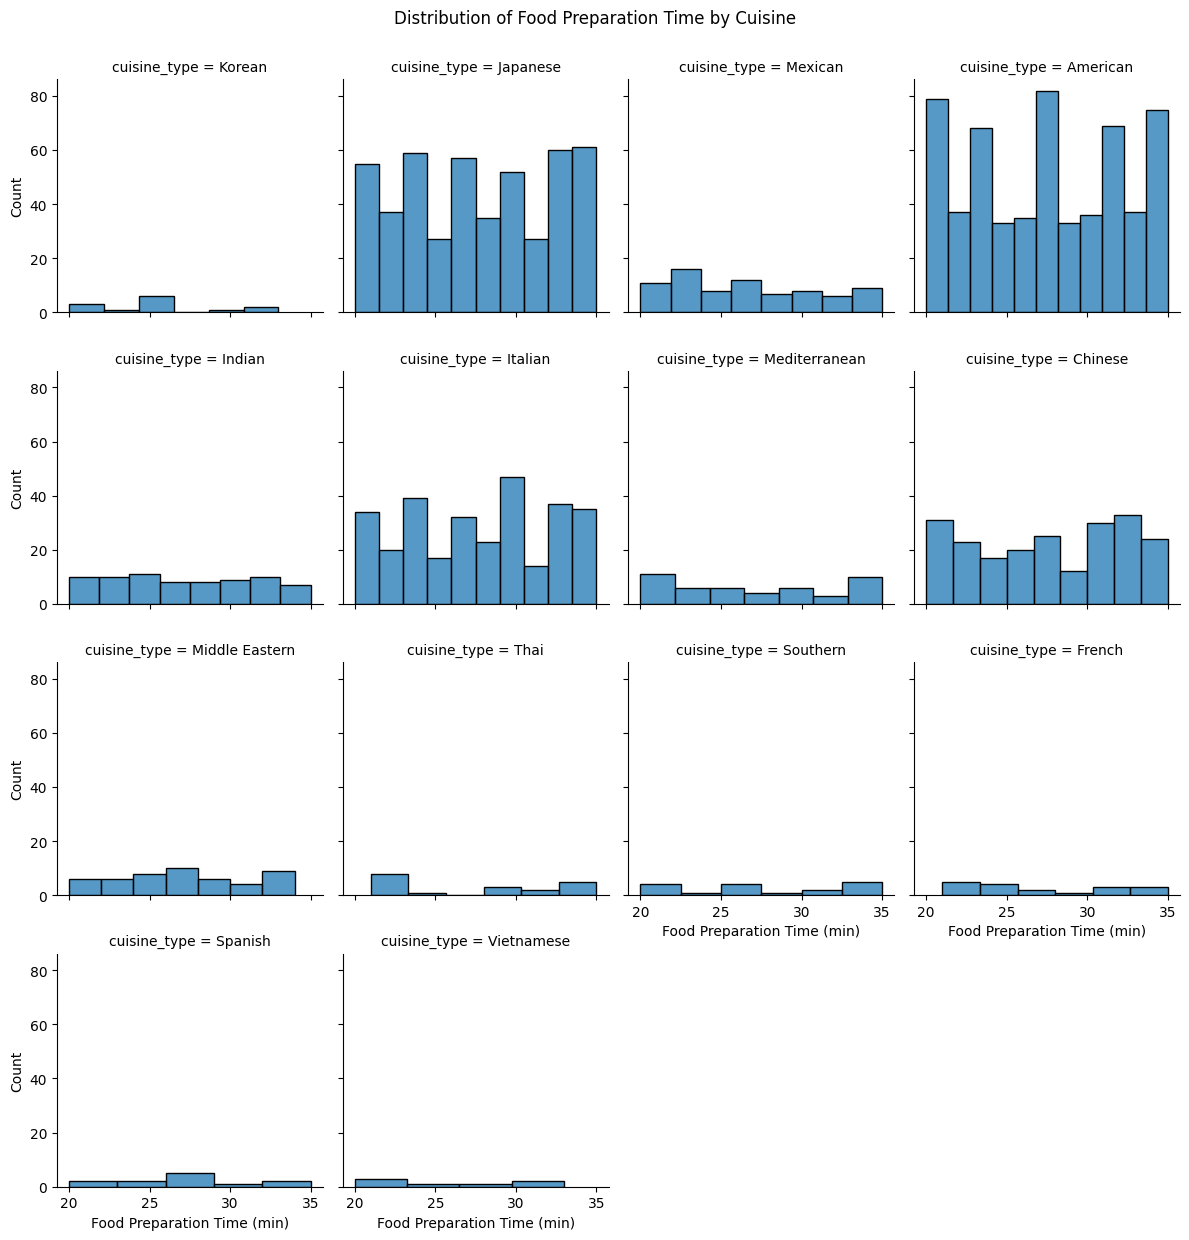

In [39]:
# Distribution of food preparation time by cuisine using histograms
g=sns.FacetGrid(df,col='cuisine_type',col_wrap=4)
g.map(sns.histplot,'food_preparation_time');
g.set_axis_labels("Food Preparation Time (min)", "Count")
g.fig.suptitle("Distribution of Food Preparation Time by Cuisine", y=1.03)


Observations:


*   None of the cuisines tend to have a shorter or longer food preparation time relative to each other.
*   The food preparation time for each cuisine is somewhat uniformly distrubited.



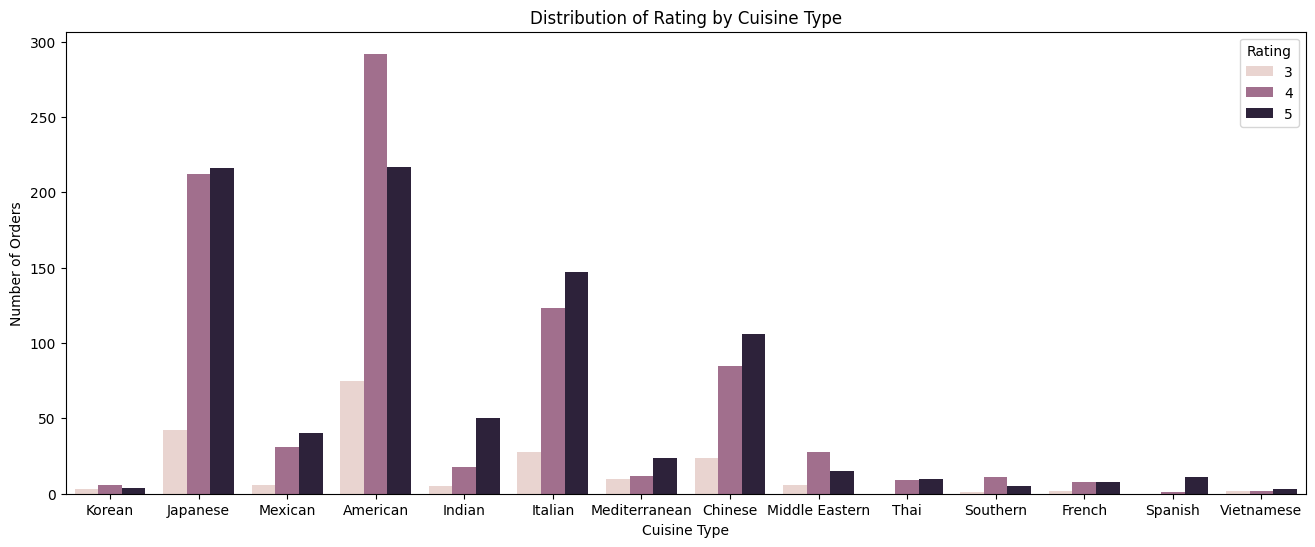

In [40]:
# Distribution of rating by cuisine type using a countplot
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='cuisine_type',hue='rating');
plt.title('Distribution of Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.legend(title='Rating')
plt.show()

Observations:


*   Most cuisine types follow the same trend: the mode rating is 5, followed by 4 then 3.
*   However exceptions to this trend is Korean, American, Middle Eastern and Southern cuisines where the mode rating is 4.







### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [41]:
# Calculating the average rating grouped by restaurant_name
avg_rating=df.groupby(['restaurant_name'])['rating'].mean()

In [42]:
# Calculating the rating count grouped by restaurant_name
count_rating=df.groupby(['restaurant_name'])['rating'].count()

In [43]:
# Combining average and count into a single DataFrame
rating_stats = pd.DataFrame({
    'avg_rating': avg_rating,
    'count_rating': count_rating})

In [44]:
# Filtering for restaurants that meet the criteria for the promotional offer
restaurant_promo = rating_stats[(rating_stats['avg_rating'] > 4) & (rating_stats['count_rating'] > 50)].reset_index()
restaurant_promo

,restaurant_name,avg_rating,count_rating
0,Blue Ribbon Fried Chicken,4.218750,96
1,Blue Ribbon Sushi,4.134454,119
2,Parm,4.073529,68
3,RedFarm Broadway,4.169492,59
4,RedFarm Hudson,4.109091,55
5,Shake Shack,4.168950,219
6,The Meatball Shop,4.689394,132


#### Observations: There are only 7 restaurants that will receive the promotional offer: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Parm, RedFarm Broadway, RedFarm Hudson, Shake Shack and The Meatball Shop.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [49]:
# Creating a function to generate comission according to the criteria
def apply_comission(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return 0

# Applying the function to the cost_of_the_order column
df['comission'] = df['cost_of_the_order'].apply(apply_comission)

# Printing the net revenue
print('The net revenue is: $',df['comission'].sum(),sep='')

The net revenue is: $6166.303


#### Observations: The net revenue is $6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [46]:
# Creating a new column with the calculated total time to deliver food
df['total_time']=df['food_preparation_time']+df['delivery_time']


In [47]:
# Calculating % of orders that take more than 60 min
percentage_over_60_min=(df[df['total_time']>60].shape[0]/df.shape[0])*100
percentage_over_60_min

10.537407797681771

#### Observations: 10.54% of orders took more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [48]:
# Write the code here
avg_delivery_time=df.groupby(['day_of_the_week'])['delivery_time'].mean()
avg_delivery_time

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: The mean delivery time on weekdays (28.34 min) is longer than the mean delivery time on the weekend (22.47 min).


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The mean delivery time on weekdays (28.34 min) is longer than the mean delivery time on weekends (22.47 min), despite more orders being placed on the weekends.
  * This could be due to more traffic on the roads during the weekdays or a lack of delivery drivers available during the weekdays.
  * The locations of the restaurants could be situated closer to places of residence and further away from places of work.
* The most popular cuisine types (in descending order) are American, Japanese, Italian and Chinese.
  * This could be due to personal preferences or due to a lack of representation of restaurants in the app of other cuisine types (Such as Vietnemese or Korean).
* A large amount of orders are not rated (736 out of 1898).
  * This is unfortunate as the feedback rating is a useful metric in providing insight into customer satisfication and insight on which areas the company can improve on.
    * Although the 'Not given' ratings were imputed with the median value, it is not as representative of the true nature of the data compared to an actual rating given by a customer.
  * This could be due to a lack of incentive to provide feedback or simply the UX/UI for the feedabck component is poor.



### Recommendations:

*  In order to decrease delivery time during the weekdays:
  * Expand the weekday delivery fleet or offer weekday-specific incentives.
  * Use live traffic data to optimize delivery routes.
* In order to increase orders for other cuisine types:
  * Advertise the delivery service to restaurants that are not represented on the app.
  * Recommend highly rated restaurants from cuisines that are not so popular in the home page of the delivery app.
* Although there were no significant relationships between the rating and other metrics in this dataset, increasing the sample size of ratings will increase the statistical power and ability to identify significant relationships between the rating and other variables.
  * Incentivise the customer to provide feedback for each order by earning some sort of 'credit' or 'points' per feedbck rating.
  * Improve the UX/UI of the feedback component in the app.
    


---